In [1]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///fund.db')

In [27]:
df = pd.read_sql(sql='select date, nav from price where fund_id = "0050 元大台灣50"', con=engine)

In [50]:
df["date"] = pd.to_datetime(df['date'],unit='s')+ pd.Timedelta('08:00:00')

In [4]:
df.iloc[:-250].to_csv("0050_train.csv", index = False)
df.iloc[-250:].to_csv("0050_test.csv", index = False)

# Part 1 - Data Preprocessing

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the training set


In [30]:
dataset_train = pd.read_csv('0050_train.csv')
training_set = dataset_train.iloc[:, 0:1].values

## Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

In [33]:
X_train = []
y_train = []
for i in range(4, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-4:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

## Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## Initialising the RNN

In [35]:
regressor = Sequential()

## Adding  LSTM layer and some Dropout regularisation

### Adding the first LSTM layer and some Dropout regularisation

In [36]:
regressor.add(LSTM(units = 8, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [37]:
regressor.add(LSTM(units = 16))
#regressor.add(Dropout(0.2))

### # Adding the output layer

In [38]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [39]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the Training set

In [40]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
3348/3348 [==============================] - 3s 940us/step - loss: 0.0795
Epoch 2/100
3348/3348 [==============================] - 1s 197us/step - loss: 0.0126
Epoch 3/100
3348/3348 [==============================] - 1s 194us/step - loss: 0.0090
Epoch 4/100
3348/3348 [==============================] - 1s 209us/step - loss: 0.0086
Epoch 5/100
3348/3348 [==============================] - 1s 214us/step - loss: 0.0084
Epoch 6/100
3348/3348 [==============================] - 1s 215us/step - loss: 0.0082
Epoch 7/100
3348/3348 [==============================] - 1s 203us/step - loss: 0.0081
Epoch 8/100
3348/3348 [==============================] - 1s 199us/step - loss: 0.0080
Epoch 9/100
3348/3348 [==============================] - 1s 212us/step - loss: 0.0078
Epoch 10/100
3348/3348 [==============================] - 1s 205us/step - loss: 0.0076
Epoch 11/100
3348/3348 [==============================] - 1s 208us/step - loss: 0.0073
Epoch 12/100
3348/3348 [============================

# Part 3 - Making the predictions and visualising the results

## Importing the libraries

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

## Getting the real stock price of 0050

In [52]:
dataset_test = pd.read_csv('0050_test.csv')
real_stock_price = dataset_test.iloc[:, 0:1].values

## Getting the predicted stock price of 0050

In [213]:
dataset_total = pd.concat((dataset_train['nav'], dataset_test['nav']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 4:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(4, 254):
    X_test.append(inputs[i-4:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
te = X_test[0:1]
ans = []
for i in range(250):
    predict = regressor.predict(te)
    ans.append(predict[0])
    te = list(te[0][1:4])
    te.append(predict[0])
    te = np.asarray([te])
    print(te)
ans = sc.inverse_transform(ans)

[[[0.40801845]
  [0.41050204]
  [0.41635622]
  [0.40845281]]]
[[[0.41050204]
  [0.41635622]
  [0.40845281]
  [0.40097755]]]
[[[0.41635622]
  [0.40845281]
  [0.40097755]
  [0.39347225]]]
[[[0.40845281]
  [0.40097755]
  [0.39347225]
  [0.38631263]]]
[[[0.40097755]
  [0.39347225]
  [0.38631263]
  [0.37978142]]]
[[[0.39347225]
  [0.38631263]
  [0.37978142]
  [0.3738434 ]]]
[[[0.38631263]
  [0.37978142]
  [0.3738434 ]
  [0.36847216]]]
[[[0.37978142]
  [0.3738434 ]
  [0.36847216]
  [0.36362383]]]
[[[0.3738434 ]
  [0.36847216]
  [0.36362383]
  [0.35925052]]]
[[[0.36847216]
  [0.36362383]
  [0.35925052]
  [0.35530752]]]
[[[0.36362383]
  [0.35925052]
  [0.35530752]
  [0.35175323]]]
[[[0.35925052]
  [0.35530752]
  [0.35175323]
  [0.34854969]]]
[[[0.35530752]
  [0.35175323]
  [0.34854969]
  [0.34566259]]]
[[[0.35175323]
  [0.34854969]
  [0.34566259]
  [0.34306076]]]
[[[0.34854969]
  [0.34566259]
  [0.34306076]
  [0.34071615]]]
[[[0.34566259]
  [0.34306076]
  [0.34071615]
  [0.33860335]]]
[[[0.343

[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.31936911]
  [0.31936911]
  [0.31936911]
  [0.31936911]]]
[[[0.319

## Visualising the results

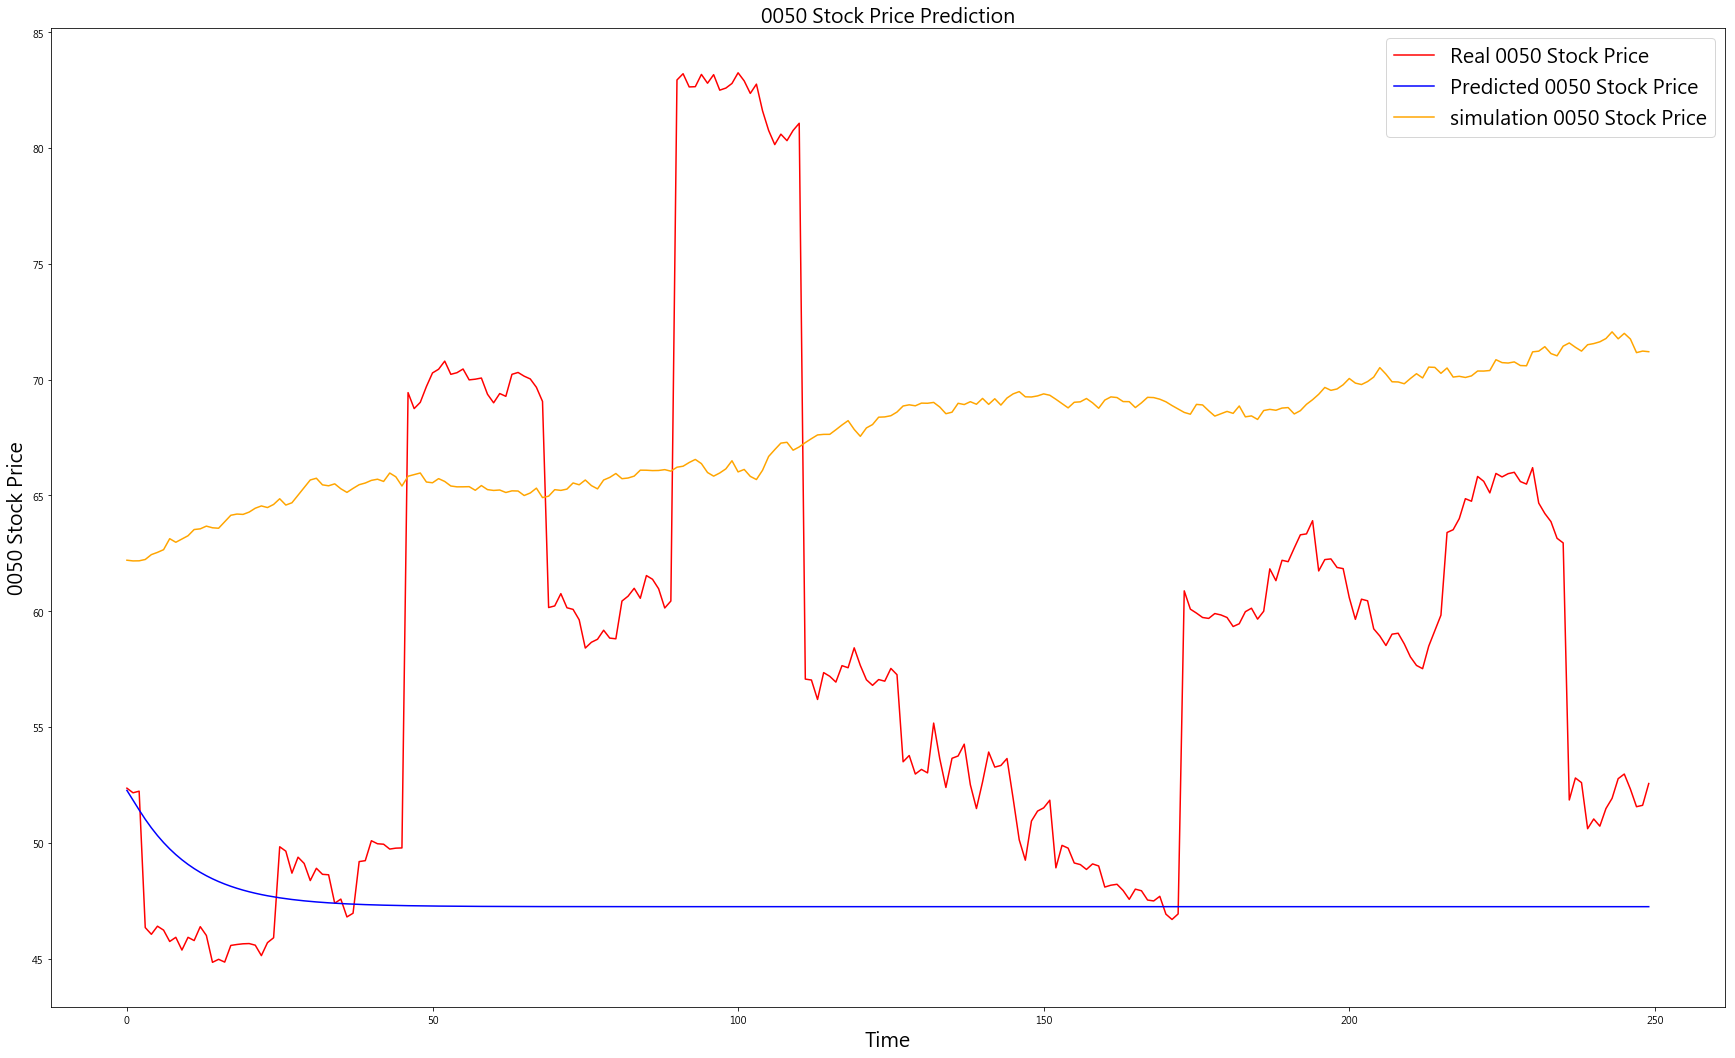

In [212]:
plt.figure(figsize=(30,18))
plt.plot(real_stock_price, color = 'red', label = 'Real 0050 Stock Price')
plt.plot(ans, color = 'blue', label = 'Predicted 0050 Stock Price')
plt.plot(price.iloc[1:].values, color = 'orange', label = 'simulation 0050 Stock Price')
plt.title('0050 Stock Price Prediction', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('0050 Stock Price', fontsize=20)
plt.legend(fontsize=20)
plt.savefig("0050_precdict.png",bbox_inches='tight', ppi = 300)
# plt.show()

In [66]:
df = pd.read_sql(sql='select date,nav from price where fund_id = "0050 元大台灣50" order by date', con=engine)

In [67]:
df = df[-360:-60]

In [3]:
import math
from business_calendar import Calendar

In [4]:
#a = datetime.strptime("2016-07-20", '%Y-%m-%d')
#b = datetime.strptime("2017-10-02", '%Y-%m-%d')
#days = Calendar().busdaycount(a, b)
years = 60 / 365.25
Δt = years / 60
mean_profit = 0.18
std_profit = 0.06
price = pd.DataFrame({'price':62.14}, index=[i for i in range(251)])

In [5]:
for i in range(250):
    price.iloc[i+1] = price.iloc[i] * (1 + mean_profit * Δt + np.random.randn() * std_profit* math.sqrt(Δt))

In [6]:
price["day"] = [i+1 for i in range(len(price))]

In [7]:
price

,price,day
0,62.140000,1
1,62.029164,2
2,62.044332,3
3,61.935609,4
4,61.931289,5
5,62.119360,6
6,62.066042,7
7,61.986067,8
8,62.188799,9
9,62.218462,10


In [9]:
from bokeh.plotting import figure, output_file, show

output_file("line.html")

p = figure(plot_width=400, plot_height=400)

# add a line renderer
p.line("day", "price", line_width=2, source= price)
p.line([i+1 for i in range(len(price))], 1, line_width=2)

show(p)

In [73]:
(df["nav"] / df["nav"].iloc[0]).std()

0.06509192377898651

In [84]:
real_stock_price

array([[62.14],
       [62.73],
       [63.3 ],
       [63.34],
       [63.91],
       [61.74],
       [62.23],
       [62.26],
       [61.89],
       [61.84],
       [60.59],
       [59.65],
       [60.52],
       [60.45],
       [59.24],
       [58.93],
       [58.52],
       [59.01],
       [59.05],
       [58.59],
       [58.03],
       [57.66],
       [57.52],
       [58.49],
       [59.16],
       [59.83],
       [63.4 ],
       [63.52],
       [64.  ],
       [64.86],
       [64.75],
       [65.82],
       [65.61],
       [65.11],
       [65.95],
       [65.8 ],
       [65.94],
       [66.  ],
       [65.6 ],
       [65.49],
       [66.2 ],
       [64.67],
       [64.22],
       [63.87],
       [63.15],
       [62.95],
       [51.85],
       [52.8 ],
       [52.6 ],
       [50.61],
       [51.03],
       [50.72],
       [51.48],
       [51.92],
       [52.77],
       [52.97],
       [52.32],
       [51.56],
       [51.62],
       [52.56]])

# PROPHET

In [15]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime as datetime
from sklearn import metrics
%matplotlib inline

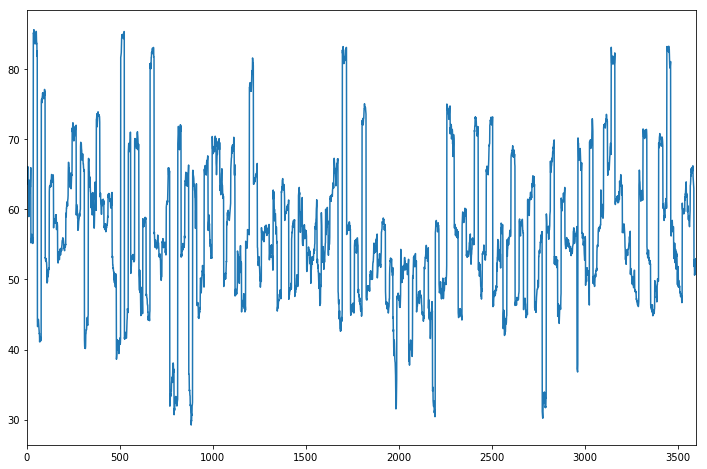

In [20]:
df["nav"].plot(figsize=(12, 8))

In [69]:
model = Prophet()

In [70]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
future = model.make_future_dataframe(periods=1015)
future.tail()

,ds
4612,2020-10-05
4613,2020-10-06
4614,2020-10-07
4615,2020-10-08
4616,2020-10-09


In [73]:
forecast = model.predict(future)

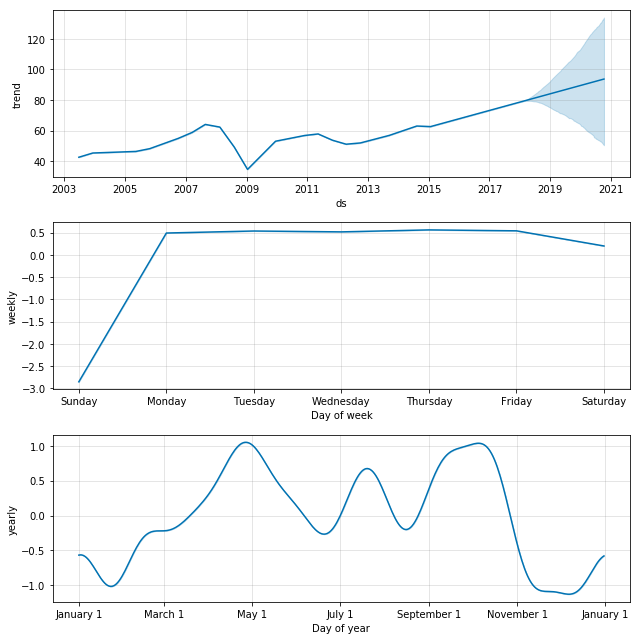

In [78]:
figure=model.plot_components(forecast)

In [64]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-06-25,42.517339,38.839728,47.115494,42.517339,42.517339,0.294438,0.294438,0.294438,0.518139,0.518139,0.518139,-0.223700,-0.223700,-0.223700,0.0,0.0,0.0,42.811777
1,2003-06-26,42.534263,38.966837,46.981522,42.534263,42.534263,0.360711,0.360711,0.360711,0.562552,0.562552,0.562552,-0.201840,-0.201840,-0.201840,0.0,0.0,0.0,42.894974
2,2003-06-27,42.551186,38.456289,46.743649,42.551186,42.551186,0.366093,0.366093,0.366093,0.541788,0.541788,0.541788,-0.175695,-0.175695,-0.175695,0.0,0.0,0.0,42.917280
3,2003-06-30,42.601958,38.793314,47.294062,42.601958,42.601958,0.418736,0.418736,0.418736,0.492280,0.492280,0.492280,-0.073543,-0.073543,-0.073543,0.0,0.0,0.0,43.020694
4,2003-07-01,42.618881,38.914982,47.571991,42.618881,42.618881,0.505042,0.505042,0.505042,0.537602,0.537602,0.537602,-0.032560,-0.032560,-0.032560,0.0,0.0,0.0,43.123923
5,2003-07-02,42.635805,38.769201,47.517358,42.635805,42.635805,0.529399,0.529399,0.529399,0.518139,0.518139,0.518139,0.011260,0.011260,0.011260,0.0,0.0,0.0,43.165204
6,2003-07-03,42.652729,39.043057,47.603683,42.652729,42.652729,0.620016,0.620016,0.620016,0.562552,0.562552,0.562552,0.057464,0.057464,0.057464,0.0,0.0,0.0,43.272744
7,2003-07-04,42.669653,39.281752,47.614996,42.669653,42.669653,0.647341,0.647341,0.647341,0.541788,0.541788,0.541788,0.105553,0.105553,0.105553,0.0,0.0,0.0,43.316994
8,2003-07-07,42.720424,39.295020,47.556986,42.720424,42.720424,0.747927,0.747927,0.747927,0.492280,0.492280,0.492280,0.255647,0.255647,0.255647,0.0,0.0,0.0,43.468350
9,2003-07-08,42.737348,39.522542,47.890496,42.737348,42.737348,0.843276,0.843276,0.843276,0.537602,0.537602,0.537602,0.305675,0.305675,0.305675,0.0,0.0,0.0,43.580624
